In [82]:
import open3d as o3d

In [3]:
import numpy as np
import matplotlib.pyplot as plt
n1 = 15000
n2 = 12000
X = np.linspace(-1, 1, num=n1) # Meshgrid in X
Y = np.linspace(-1, 1, num=n2) #Meshgrid in Y``
[XX, YY] = np.meshgrid(X, Y)# Create  meshgrid of X and Y
Z = 1-(XX)**2 -  (YY)**2
noise = np.random.normal(0, 1, n1*n2) # The multiplicative factor multiplies a reasonable amount of noise to the parabolic surface... 
noise = np.reshape(noise, (n2, n1))*0.1
Znoise = Z+noise

#fig = plt.figure()
#ax = fig.add_subplot(projection='3d')

#ax.scatter(XX.reshape((-1, 1)), YY.reshape((-1, 1)), Znoise.reshape((-1, 1)))

This paraboloid is noisy in nature

In [4]:
import skimage.io
img = skimage.io.imread('/home/vinayak/nasher_museum/image.jpeg')

In [5]:
from skimage.transform import resize

In [6]:
img_resize = resize(img, (n2, n1), anti_aliasing = True)

In [7]:
img_resize.shape

(12000, 15000, 3)

In [8]:
XX.shape

(12000, 15000)

In [9]:
rgbd = np.hstack((XX.reshape((-1,1)), YY.reshape((-1,1)), Z.reshape((-1,1)), img_resize[:,:, 0].reshape((-1, 1)), img_resize[:,:, 1].reshape((-1, 1)), img_resize[:,:, 2].reshape((-1, 1))))

In [10]:
pcd = rgbd[:, :3]

In [11]:
rgbd

array([[-1.        , -1.        , -1.        ,  0.64813628,  0.67166569,
         0.72656765],
       [-0.99986666, -1.        , -0.99973333,  0.64823563,  0.67176504,
         0.726667  ],
       [-0.99973332, -1.        , -0.9994667 ,  0.64833498,  0.67186439,
         0.72676635],
       ...,
       [ 0.99973332,  1.        , -0.9994667 ,  0.11608826,  0.1261765 ,
         0.13980722],
       [ 0.99986666,  1.        , -0.99973333,  0.11588956,  0.12597779,
         0.13960851],
       [ 1.        ,  1.        , -1.        ,  0.11569086,  0.12577909,
         0.13940981]])

In [12]:
pcd

array([[-1.        , -1.        , -1.        ],
       [-0.99986666, -1.        , -0.99973333],
       [-0.99973332, -1.        , -0.9994667 ],
       ...,
       [ 0.99973332,  1.        , -0.9994667 ],
       [ 0.99986666,  1.        , -0.99973333],
       [ 1.        ,  1.        , -1.        ]])

In [13]:
pcd = rgbd[:,: 3]

In [14]:
pcd

array([[-1.        , -1.        , -1.        ],
       [-0.99986666, -1.        , -0.99973333],
       [-0.99973332, -1.        , -0.9994667 ],
       ...,
       [ 0.99973332,  1.        , -0.9994667 ],
       [ 0.99986666,  1.        , -0.99973333],
       [ 1.        ,  1.        , -1.        ]])

In [15]:
Z.reshape((-1, 1))

array([[-1.        ],
       [-0.99973333],
       [-0.9994667 ],
       ...,
       [-0.9994667 ],
       [-0.99973333],
       [-1.        ]])

In [34]:
image = rgbd[:, 3]

In [35]:
import matplotlib.pyplot as plt

TypeError: _reshape_dispatcher() missing 1 required positional argument: 'newshape'

In [31]:
import open3d as o3d
import numpy as np
print("Load a ply point cloud, print it, and render it")
#ply_point_cloud = o3d.data.PLYPointCloud()
pcd = o3d.geometry.PointCloud()
pcd = o3d.io.read_point_cloud(ply_point_cloud.path)
pcd.points = o3d.utility.Vector3dVector(rgbd[:,: 3])
pcd.colors = image
#print(pcd)
#print(np.asarray(pcd.points))
o3d.visualization.draw_geometries([pcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])

Load a ply point cloud, print it, and render it


NameError: name 'ply_point_cloud' is not defined

TypeError: Invalid shape (180000000,) for image data

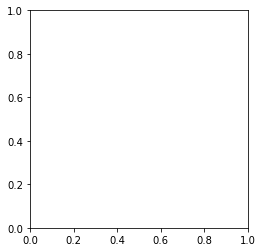

In [32]:
plt.imshow(image)

In [30]:
rgbd[:, :3]

array([[-1.        , -1.        , -1.        ],
       [-0.99986666, -1.        , -0.99973333],
       [-0.99973332, -1.        , -0.9994667 ],
       ...,
       [ 0.99973332,  1.        , -0.9994667 ],
       [ 0.99986666,  1.        , -0.99973333],
       [ 1.        ,  1.        , -1.        ]])

In [266]:
import open3d as o3d
#o3d.visualization.webrtc_server.enable_webrtc()

In [222]:
np.asarray(pcd.points)

SyntaxError: invalid syntax (696659979.py, line 1)

In [234]:
rgbd.shape

(1800000, 6)

In [235]:
img_resize[:,:, 2].reshape((-1,1))

array([[0.72764733],
       [0.72774428],
       [0.72633851],
       ...,
       [0.13895153],
       [0.14176307],
       [0.14156917]])

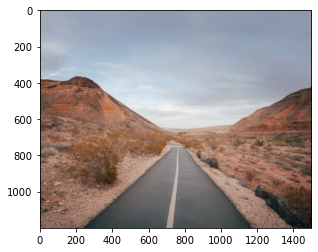

In [236]:
plt.imshow(rgbd[:, 3:6].reshape(n2, n1, 3))

In [154]:
coordinates= open("text.txt", "w")
for row in rgbd:
    np.savetxt(coordinates, row)
coordinates.close()

In [155]:
rgbd[:, : 3].shape

(1800000, 3)

In [156]:
rgbd.shape

(1800000, 6)

In [157]:
#rgbd[:, 3:6] = rgbd[:, 3:6]

In [158]:
#rgbd[:, :3].shape

In [290]:
import open3d as o3d
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(rgbd[:, :3])
o3d.visualization.draw_geometries([pcd])          

In [117]:
pcd_numpy = np.asarray(pcd)

In [24]:
o3d.io.write_point_cloud("./nasher_museum/coordinates_2.ply", pcd)

[Open3D WARNING] Write PLY failed: point cloud has 0 points.


False

In [239]:
print("Load a ply point cloud, print it, and render it")
#ply_point_cloud = o3d.data.PLYPointCloud()
#pcd = o3d.io.read_point_cloud(ply_point_cloud.path)
print(pcd)
print(np.asarray(pcd.points))
o3d.visualization.draw_geometries([pcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])

Load a ply point cloud, print it, and render it
PointCloud with 196133 points.
[[0.65234375 0.84686458 2.37890625]
 [0.65234375 0.83984375 2.38430572]
 [0.66737998 0.83984375 2.37890625]
 ...
 [2.00839925 2.39453125 1.88671875]
 [2.00390625 2.39488506 1.88671875]
 [2.00390625 2.39453125 1.88793314]]


In [1]:
# ----------------------------------------------------------------------------
# -                        Open3D: www.open3d.org                            -
# ----------------------------------------------------------------------------
# The MIT License (MIT)
#
# Copyright (c) 2018-2021 www.open3d.org
#
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS
# IN THE SOFTWARE.
# ----------------------------------------------------------------------------
import open3d as o3d # Using open 3d software as visualizer
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
from skimage.transform import resize
if __name__ == "__main__":
    o3d.visualization.webrtc_server.enable_webrtc() # To enable visualization on web browser rather than local window
    n1 = 15000 #Pixel size in x
    n2 = 12000 #Pixel size in y
    X = np.linspace(-1, 1, num=n1) # Meshgrid in X
    Y = np.linspace(-1, 1, num=n2) #Meshgrid in Y``
    [XX, YY] = np.meshgrid(X, Y)# Create  meshgrid of X and Y
    Z = -(XX)**2 -  (YY)**2 # Create parabola surface
    noise = np.random.normal(0, 1, n1*n2)  
    noise = np.reshape(noise, (n2, n1))*0.1 # The multiplicative factor multiplies a reasonable amount of noise to be added to the parabolic surface...
    Znoise = Z+noise # Adding noise to the parabola
        #fig = plt.figure()
        #ax = fig.add_subplot(projection='3d')
        #ax.scatter(XX.reshape((-1, 1)), YY.reshape((-1, 1)), Znoise.reshape((-1, 1)))
    img = skimage.io.imread('/home/vinayak/nasher_museum/image.jpeg')
    rgbd = np.hstack((XX.reshape((-1,1)), YY.reshape((-1,1)), Z.reshape((-1,1)), img_resize[:,:, 0].reshape((-1, 1)), img_resize[:,:, 1].reshape((-1, 1)), img_resize[:,:, 2].reshape((-1, 1))))
    pcd = rgbd[:, :3]
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(rgbd[:, :3])
    pcd.colors = o3d.utility.Vector3dVector(rgbd[:, 3:])
    
    #o3d.visualization.draw([pcd]) # Draws the parabolic visualization



Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D INFO] WebRTC GUI backend enabled.


RuntimeError: [1;31m[Open3D Error] (void open3d::visualization::gui::Application::SetWindowSystem(std::shared_ptr<open3d::visualization::gui::WindowSystem>)) /root/Open3D/cpp/open3d/visualization/gui/Application.cpp:355: Cannot set WindowSystem. It is already set.
[0;m

## Save point cloud without meshing in form of .las or other formats

## Save point cloud with meshing

In [20]:
# ----------------------------------------------------------------------------
# -                        Open3D: www.open3d.org                            -
# ----------------------------------------------------------------------------
# The MIT License (MIT)
#
# Copyright (c) 2018-2021 www.open3d.org
#
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS
# IN THE SOFTWARE.
# ----------------------------------------------------------------------------
import open3d as o3d # Using open 3d software as visualizer
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
from skimage.transform import resize
#if __name__ == "__main__":
    #o3d.visualization.webrtc_server.enable_webrtc() # To enable visualization on web browser rather than local window
n1 = 1500 #Pixel size in x
n2 = 1200 #Pixel size in y
X = np.linspace(-1, 1, num=n1) # Meshgrid in X
Y = np.linspace(-1, 1, num=n2) #Meshgrid in Y``
[XX, YY] = np.meshgrid(X, Y)# Create  meshgrid of X and Y
Z = -(XX)**2 -  (YY)**2 # Create parabola surface
Znorm = -2*XX - 2*YY
noise = np.random.normal(0, 1, n1*n2)  
noise = np.reshape(noise, (n2, n1))*0.1 # The multiplicative factor multiplies a reasonable amount of noise to be added to the parabolic surface...
Znoise = Z+noise # Adding noise to the parabola
        #fig = plt.figure()
        #ax = fig.add_subplot(projection='3d')
        #ax.scatter(XX.reshape((-1, 1)), YY.reshape((-1, 1)), Znoise.reshape((-1, 1)))
img = skimage.io.imread('/home/vinayak/nasher_museum/image.jpeg')
img_resize = resize(img, (n1, n2), anti_aliasing = True)
rgbd = np.hstack((XX.reshape((-1,1)), YY.reshape((-1,1)), Z.reshape((-1,1)), img_resize[:,:, 0].reshape((-1, 1)), img_resize[:,:, 1].reshape((-1, 1)), img_resize[:,:, 2].reshape((-1, 1))))

pcd = rgbd[:, :3]
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(rgbd[:, :3])
pcd.colors = o3d.utility.Vector3dVector(rgbd[:, 3:])
#alpha = 0.0001
#mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_alpha_shape(pcd, alpha)
#mesh.compute_vertex_normals()

#open3d.io.write_triangle_mesh("sample.gltf", mesh, write_ascii=False, compressed=False, write_vertex_normals=True, write_vertex_colors=True, write_triangle_uvs=True, print_progress=False)

#with o3d.utility.VerbosityContextManager(o3d.utility.VerbosityLevel.Debug) as cm:
 #   mesh, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd, depth=9)
#print(mesh)


#o3d.io.write_triangle_mesh(output_path+"bpa_mesh.gltf", dec_mesh)
#o3d.io.write_point_cloud("testname.glb", pcd, write_ascii=False, compressed=False, print_progress=False)



    ##Meshing
#distances = pcd.compute_nearest_neighbor_distance()
#avg_dist = np.mean(distances)
#radius = 3 * avg_dist
    
#bpa_mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(pcd,o3d.utility.DoubleVector([radius, radius * 2]))
    #o3d.visualization.draw([pcd]) # Draws the parabolic visualization
    
#bpa_mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(pcd,o3d.utility.DoubleVector([radius, radius * 2]))
    
#dec_mesh = mesh.simplify_quadric_decimation(100000)
#dec_mesh.remove_degenerate_triangles()
#dec_mesh.remove_duplicated_triangles()
#dec_mesh.remove_duplicated_vertices()
#dec_mesh.remove_non_manifold_edges()

#o3d.io.write_triangle_mesh(output_path+"bpa_mesh.gltf", dec_mesh)
    #o3d.io.write_triangle_mesh(output_path+"p_mesh_c.gltf", p_mesh_crop)
o3d.io.write_point_cloud("sample_point_cloud.pcd", pcd)



True

In [5]:
pcd.normals

std::vector<Eigen::Vector3d> with 0 elements.
Use numpy.asarray() to access data.

In [7]:
o3d.geometry.estimate_normals(
        downpcd,
        search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1,
                                                          max_nn=30))

AttributeError: module 'open3d.cuda.pybind.geometry' has no attribute 'estimate_normals'